# Etivity 2 

Name: Éamon  Ó'Gáirbhith


Student ID: 9638296

# TASK 1 (CS5062)

Fill-in the missing values in the bank dataset. Use the EDA techniques from E-tivity 1 to decide how to fill in missing values. In your notebook, explain shortly (max 250 words) the decisions you have taken.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import io
import seaborn as sns
from google.colab import files

In [2]:
uploaded = files.upload()

Saving bank_et2.csv to bank_et2 (1).csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['bank_et2.csv']))

In [4]:
df.head(15)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,5,46.0,self-employed,divorced,tertiary,no,926,0.233619,0.922197,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,6,34.0,blue-collar,married,secondary,no,1924,0.022648,0.724227,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,7,45.0,services,divorced,secondary,no,396,-0.724889,-0.998605,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,8,58.0,management,divorced,tertiary,no,315,0.502131,-0.045391,yes,no,cellular,1,apr,121,2,135,2,failure,no
9,9,49.0,management,divorced,tertiary,no,20727,1.331625,-0.420830,no,no,cellular,1,apr,285,3,132,2,failure,no


In [5]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Unnamed: 0        0
age              12
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64

Code below presents the same information as above but excludes the attibutes with no missinng data and also gives the % of missing data for the attibute(s) in question

In [0]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'No. of Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [8]:
missing_values_table(df)

Your selected dataframe has 20 columns.
There are 5 columns that have missing values.


,No. of Missing Values,% of Total Values
poutcome,454,22.7
contact,191,9.6
education,104,5.2
age,12,0.6
job,10,0.5


The above shows that a large volume (22.7%) of the poutcome data is missing while significant amounts of contact (9.6%) and education (5.2%) data is missing also.

In [18]:
df[['poutcome', 'contact', 'education', 'job']].describe()

,poutcome,contact,education,job,subscribed
count,1546,2000,1896,1990,2000
unique,3,2,3,11,2
top,failure,cellular,secondary,management,no
freq,955,1854,995,461,1000


The above shows that the the majority of the **contact** attribute contains the value cellular. With such a proportion, it is safe to impute cellular in to the missing data for this attribute. This is implemented below. The other attibutes however do not display such a dominant label so we will have to introduce another method of filling in the incomplete data.

In [10]:
df['contact'].value_counts()

cellular     1663
telephone     146
Name: contact, dtype: int64

Missing **contact** values to be replaced with with the dominant 'cellular' value

In [0]:
df['contact'].fillna('cellular', inplace=True)

In [13]:
df['contact'].value_counts()

cellular     1854
telephone     146
Name: contact, dtype: int64

We now need to impute the missing values for the other incomplete attributes. As there is no dominant value in the data that is complete in these attributes I looked for other attributes that may correlate with the attritbutes that are incomplete. I could not find any correlation here either so I have elected to impute the absent values in proportion to the ratio of the values that are populated for each attribute.

In [19]:
#Imputing poutcome values

df['poutcome'].value_counts(normalize=True, dropna=False)

failure    0.4775
NaN        0.2270
success    0.2220
other      0.0735
Name: poutcome, dtype: float64

In [20]:
df['poutcome'].value_counts(normalize=True)

failure    0.617723
success    0.287193
other      0.095084
Name: poutcome, dtype: float64

In [0]:
df['poutcome'] = df['poutcome'].fillna(pd.Series(np.random.choice(['failure', 'success', 'other'], 
                                                      p=[0.61, 0.29, 0.10], size=len(df))))

In [23]:
#Imputing education values

df['education'].value_counts(normalize=True, dropna=False)

secondary    0.4975
tertiary     0.3420
primary      0.1085
NaN          0.0520
Name: education, dtype: float64

In [24]:
df['education'].value_counts(normalize=True)

secondary    0.524789
tertiary     0.360759
primary      0.114451
Name: education, dtype: float64

In [0]:
df['education'] = df['education'].fillna(pd.Series(np.random.choice(['secondary', 'tertiary', 'primary'], 
                                                      p=[0.53, 0.36, 0.11], size=len(df))))

In [26]:
#Imputing job values

df['job'].value_counts(normalize=True, dropna=False)

management       0.2305
technician       0.1740
blue-collar      0.1490
admin.           0.1235
services         0.0825
retired          0.0810
student          0.0480
unemployed       0.0345
self-employed    0.0320
entrepreneur     0.0225
housemaid        0.0175
NaN              0.0050
Name: job, dtype: float64

In [30]:
df['job'].value_counts(normalize=True)

management       0.231658
technician       0.174874
blue-collar      0.149749
admin.           0.124121
services         0.082915
retired          0.081407
student          0.048241
unemployed       0.034673
self-employed    0.032161
entrepreneur     0.022613
housemaid        0.017588
Name: job, dtype: float64

In [0]:
df['job'] = df['job'].fillna(pd.Series(np.random.choice(['management', 'technician', 'blue-collar', 'admin', 'services', 'retired', 
                                                         'student', 'unemployed', 'self-employed','entrepreneur', 'housemaid' ], 
                                                      p=[0.24, 0.18, 0.15, 0.13, 0.08, 0.08, 0.05, 0.03, 0.03, 0.02, 0.01 ], size=len(df))))

A bit of overkill with the above considering how few values were actually missing (5%) and how unlikely it was that a number of the less common roles were going to appear but all were entered for the sake of completeness

In [42]:
df[['poutcome', 'contact', 'education', 'job']].describe()

,poutcome,contact,education,job
count,2000,2000,2000,2000
unique,3,2,3,11
top,failure,cellular,secondary,management
freq,1223,1854,1044,462


The **'age'** attribute also has missing data. As it is numerical, we will apply the mean value to missing data.

In [43]:
df[['age']].describe()

,age
count,1988.000000
mean,41.753018
std,12.724358
min,18.000000
25%,32.000000
50%,38.000000
75%,50.000000
max,93.000000


In [0]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [45]:
df[['age']].describe()

,age
count,2000.000000
mean,41.753018
std,12.686108
min,18.000000
25%,32.000000
50%,38.000000
75%,50.000000
max,93.000000


In [46]:
missing_values_table(df)

Your selected dataframe has 20 columns.
There are 0 columns that have missing values.


,No. of Missing Values,% of Total Values


**Summary**

5 Attributes (4 categoricaly and one numerical) were found to have missing data. 
These were dealt with in 3 different ways:



1.   The **Contact** attribute had the dominant value cellular assigned to the missing values.
2.   The remaining categorical missing values were assigned randomly in proportion to the distribution of populated values within the attributes
3.   The numerical attribute **age** had the mean value for the populated data assigned to the missing data



# Task 2

Decide on the treatment of outliers in the bank data set

In [52]:

df.describe(include=[np.number])

,Unnamed: 0,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,41.753018,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,577.494589,12.686108,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,0.000000,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,499.750000,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,999.500000,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,1499.250000,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,1999.000000,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


**age** and **balance** attributes above show some extreme values that require further investigation.


Text(0.5, 0.98, '')

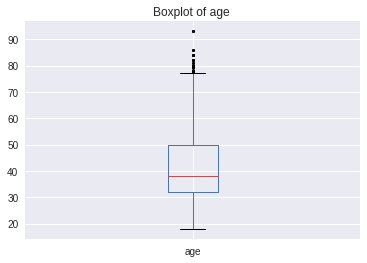

In [57]:
df.boxplot(column='age', sym='k.')

plt.title("Boxplot of age ")

# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")

Text(0.5, 0.98, '')

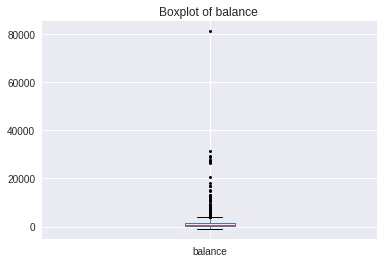

In [58]:
df.boxplot(column='balance', sym='k.')

plt.title("Boxplot of balance ")

# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")

In [48]:
df.describe(exclude=[np.number])

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,no,no,cellular,feb,failure,no
freq,462,1111,1044,1985,1037,1750,1854,404,1223,1000
